In [1]:
import sys
import numpy as np
import datetime
%pylab inline
from os import listdir, path, chdir
from matplotlib.pylab import savefig

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12.0, 6.0)

In [18]:
data_folder = "/home/photon/data/06-15-2015" #the data folder for double slit data
sys.path.append("/home/photon/code/Qfunction/")
chdir(data_folder)
import Qfunction as Q

In [19]:
allFiles = listdir(data_folder)
allFiles.sort()
allFiles

['10-42-54_raw.npz',
 '10-43-49_raw.npz',
 '14-50-22_raw.npz',
 '14-51-17_raw.npz',
 '15-05-31_raw.npz',
 '15-06-26_raw.npz',
 '15-10-41_raw.npz',
 '15-11-35_raw.npz',
 '15-21-28_raw.npz',
 '15-22-22_raw.npz',
 'FFT-06-15-2015-dataset1.png',
 'averagePhotonsErrorBars-06-15-2015-dataset1.png']

In [20]:
vacuum_npz = np.load(allFiles[0]) #vacuum of the choice pair
data_npz = np.load(allFiles[1])   #data of the choice pair
data = data_npz['dataOut']
vacuum = vacuum_npz['dataOut']
ncount = data_npz['ncount']

In [21]:
n = np.sqrt(ncount)
print("Std dev. of LO: ", n.std()/n.mean())
print("Peak to Peak as fraction of LO mean: ", (n.max()-n.min())  / n.mean())

Std dev. of LO:  0.00263544155952
Peak to Peak as fraction of LO mean:  0.0171822063418


In [22]:
Kp_vac = np.average(vacuum,axis=(1,2))

In [23]:
scaled_vc = np.sqrt(2.0/ncount)*(data - Kp_vac.reshape(600,1,1))

In [24]:
avg_n_quick = [0.5*(np.mean(np.abs(scaled_vc[i,:,:].flatten('F'))))**2 for i in range(300)]

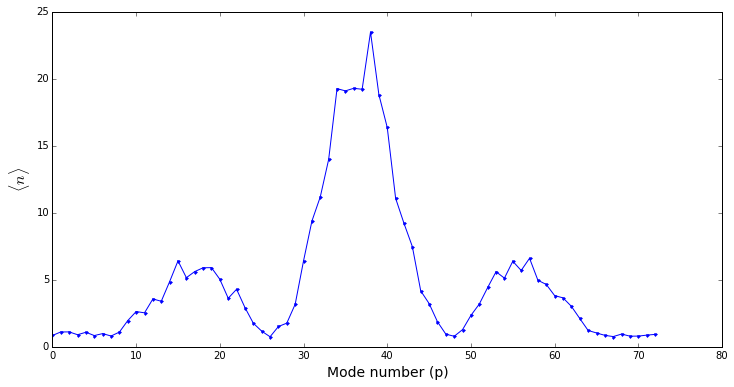

In [25]:
plot(avg_n_quick[167:240],".-")  # look at the modes with their amplitudes
xlabel("Mode number (p)",size=14)
ylabel("$\\langle n \\rangle$",size=16)

/home/photon/code/Qfunction/Qfunction.py:170: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(nsquared - avgn**2)
/usr/lib64/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


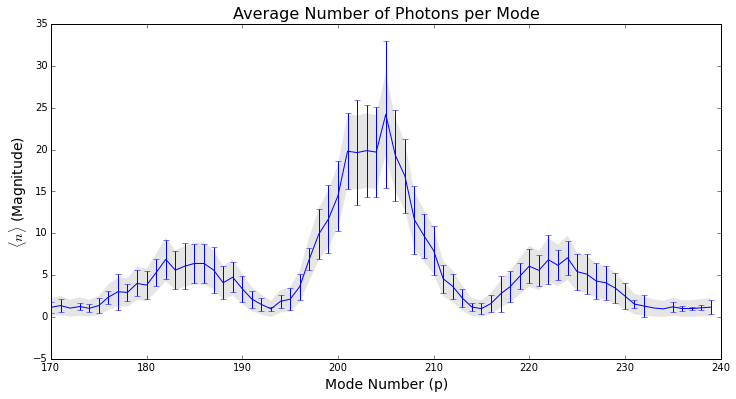

In [36]:
std_dev_n = np.zeros(300)
avg_n = np.zeros(300)
for i in range(170,240):
    x = np.real(scaled_vc[i,:,:].flatten('F'))
    y = np.imag(scaled_vc[i,:,:].flatten('F'))
    std_dev_n[i] = Q.std_n_raw(x,y)
    avg_n[i] = Q.avg_n_raw(x,y)

errorbar(arange(170,240,1),avg_n[170:240],yerr=std_dev_n[170:240])
title("Average Number of Photons per Mode", size = 16)
xlabel("Mode Number (p)",size=14)
ylabel("$\\langle n \\rangle$ (Magnitude)",size=14)
savefig("averagePhotonsErrorBars-06-15-2015-dataset1")
fill_between(arange(170,240,1),avg_n[170:240] + np.sqrt(avg_n[170:240]),avg_n[170:240] - np.sqrt(avg_n[170:240]),alpha=0.2,facecolor='gray',color="white")

In [15]:
mode = 231
check_n = 0.5*(np.abs(scaled_vc[mode,:,:].mean(axis=0)))**2  # look at the abs of one mode averaged over all shots per round:
check_var = np.abs(scaled_vc[mode,:,:]).std(axis=0)

Check the average photon number for each of the rounds. Hopefully the output is stable over these longer time scales.

(0, 1.2)

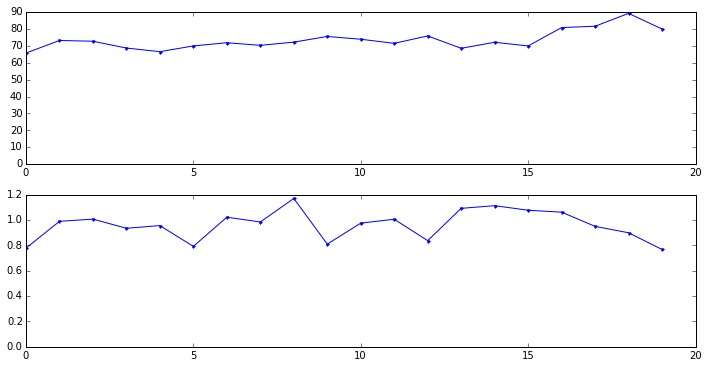

In [16]:
subplot(211)
plot(check_n,".-")
ylim(ymin=0)
subplot(212)
plot(check_var,".-")
ylim(ymin=0)

Now pick the best section of the rounds: 10:40 (not sure if this matters much, but worth checking)

In [17]:
output = scaled_vc[mode,:,0:20].flatten('F')

In [18]:
x = np.real(output)
y = np.imag(output)

In [19]:
0.5*(np.abs(output).mean())**2  # the easy calculation

78.045632711666087

In [20]:
n = Q.avg_n_raw(x,y)  # the estimated photon number from x and y
n

78.633355362219973

In [21]:
X,Y,Z = Q.kernel_estimate(x,y)

KDE kernel factor:  0.316227766017


In [22]:
print "<n_Q> = ",Q.avg_n(X,Y,Z)  # the calculated from Q function
print "<n_Q-raw> = ", Q.avg_n_raw(x,y)
print "StDev n = ", Q.std_n(X,Y,Z)
print "StDev n raw = ", Q.std_n_raw(x,y)

<n_Q> =  475.320130585
<n_Q-raw> =  78.6333553622
StDev n =  nan
StDev n raw =  26.4383571345


/home/photon/code/Qfunction/Qfunction.py:156: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(nsquared - avgn**2)


In [23]:
print "Kernel estimate noise as percent: %0.2f" % ((Q.std_n(X,Y,Z) / sqrt(Q.avg_n(X,Y,Z)) - 1)*100)
print "Raw quadratures noise as percent: %0.2f" % ((Q.std_n_raw(x,y) / sqrt(Q.avg_n_raw(x,y)) - 1)*100)

Kernel estimate noise as percent: nan
Raw quadratures noise as percent: 198.15


KDE kernel factor:  0.316227766017


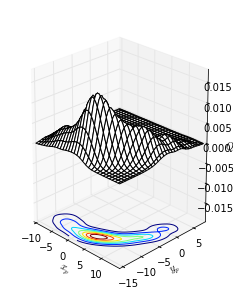

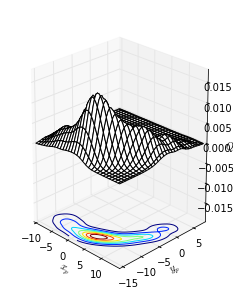

In [24]:
Q.qsurf(x,y)  # good looking figures though!

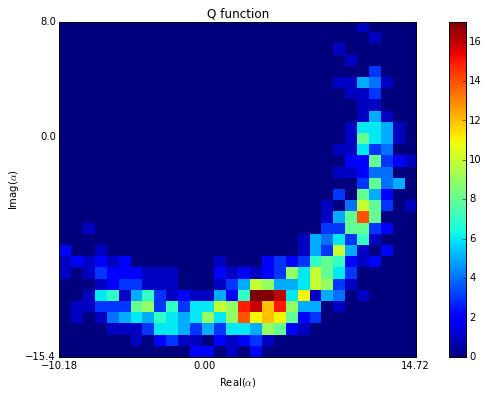

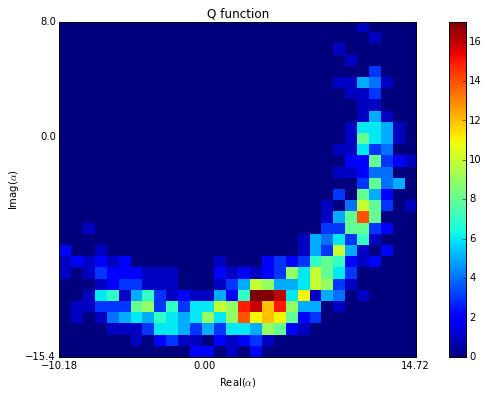

In [25]:
Q.qfuncimage(output)

In [24]:
vacFFT = np.average(vacuum,axis=(1,2))

In [25]:
VacCorrected = data[:,:,:] - vacFFT.reshape(600,1,1)

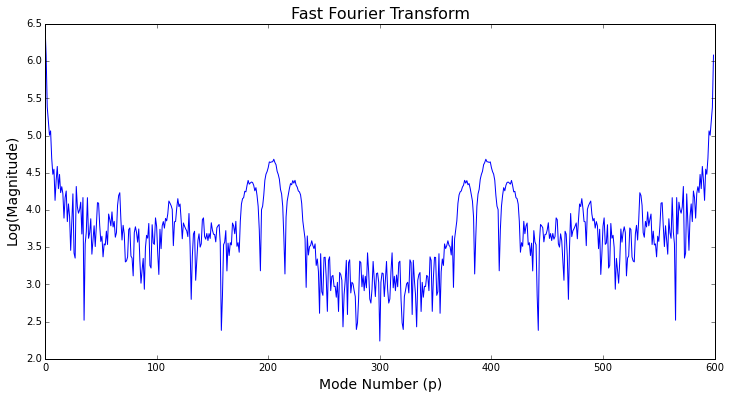

In [26]:
plt.plot( np.log10(abs((np.average(VacCorrected,axis=(1,2)))) ))
savefig("FFT-06-15-2015-dataset1")
title("Fast Fourier Transform", size = 16)
xlabel("Mode Number (p)",size=14)
ylabel("Log(Magnitude)",size=14)
savefig("FFT-06-15-2015-dataset1")